<a href="https://colab.research.google.com/github/sayf-ye/Flutter_with_ML/blob/main/mobilenetv1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:

import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.callbacks import EarlyStopping

In [23]:
epochs = 10
batch_size = 8
optimizer = SGD(learning_rate=0.0001, momentum=0.9)
train_path = '/content/train'
num_classes = 10

In [24]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 8000 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.


In [25]:
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


In [26]:
# Load MobileNetV1 base model
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Build the model
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [27]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.n // batch_size,
    callbacks=[early_stopping]
)


Epoch 1/10
1000/1000 [==============================] - 170s 164ms/step - loss: 1.4837 - accuracy: 0.5027 - val_loss: 0.5065 - val_accuracy: 0.8235
Epoch 2/10
1000/1000 [==============================] - 147s 147ms/step - loss: 0.7859 - accuracy: 0.7354 - val_loss: 0.3168 - val_accuracy: 0.9020
Epoch 3/10
1000/1000 [==============================] - 149s 149ms/step - loss: 0.6134 - accuracy: 0.7947 - val_loss: 0.2443 - val_accuracy: 0.9225
Epoch 4/10
1000/1000 [==============================] - 163s 163ms/step - loss: 0.5139 - accuracy: 0.8284 - val_loss: 0.2066 - val_accuracy: 0.9360
Epoch 5/10
1000/1000 [==============================] - 146s 146ms/step - loss: 0.4490 - accuracy: 0.8485 - val_loss: 0.1699 - val_accuracy: 0.9395
Epoch 6/10
1000/1000 [==============================] - 163s 163ms/step - loss: 0.3904 - accuracy: 0.8655 - val_loss: 0.1626 - val_accuracy: 0.9430
Epoch 7/10
1000/1000 [==============================] - 146s 146ms/step - loss: 0.3402 - accuracy: 0.8851 - val_

In [28]:
test_generator = test_datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

test_images = test_generator.filenames
test_labels = test_generator.classes

predictions = model.predict(test_generator)
predicted_labels = np.argmax(predictions, axis=1)

test_accuracy = accuracy_score(test_labels, predicted_labels)
test_f1_score = f1_score(test_labels, predicted_labels, average='weighted')

Found 10000 images belonging to 10 classes.
1250/1250 [==============================] - 26s 20ms/step


In [33]:
print("Average Train Accuracy:", np.mean(history.history['accuracy']))
print("Average Validation Accuracy:", np.mean(history.history['val_accuracy']))
print("Test Accuracy:", test_accuracy)
print("Test F1-Score:", test_f1_score)


Average Train Accuracy: 0.8150749862194061
Average Validation Accuracy: 0.9297999978065491
Test Accuracy: 0.9245
Test F1-Score: 0.9247723723076071


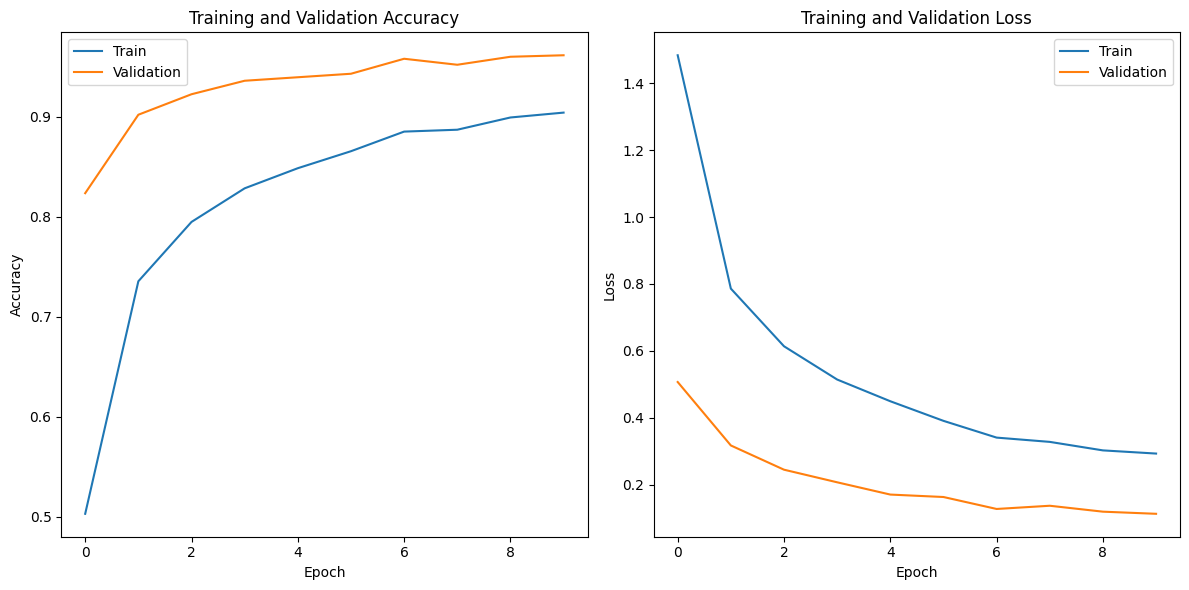

In [34]:
# Plot learning curves
plt.figure(figsize=(12, 6))

# Training and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

# Training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])

plt.tight_layout()
plt.show()

In [35]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

# Get predictions on the test set
test_generator.reset()
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

# Get true labels for the test set
true_labels = test_generator.classes

# Generate classification report
class_labels = list(test_generator.class_indices.keys())
classification_rep = classification_report(true_labels, y_pred, target_names=class_labels)
print("Classification Report:")
print(classification_rep)

# Generate confusion matrix
confusion_mtx = confusion_matrix(true_labels, y_pred)
print("Confusion Matrix:")
print(confusion_mtx)

1250/1250 [==============================] - 21s 17ms/step
Classification Report:
                                               precision    recall  f1-score   support

                      Tomato___Bacterial_spot       0.98      0.96      0.97      1000
                        Tomato___Early_blight       0.87      0.97      0.91      1000
                         Tomato___Late_blight       0.97      0.94      0.96      1000
                           Tomato___Leaf_Mold       1.00      0.96      0.98      1000
                  Tomato___Septoria_leaf_spot       0.94      0.96      0.95      1000
Tomato___Spider_mites Two-spotted_spider_mite       1.00      0.69      0.82      1000
                         Tomato___Target_Spot       0.92      0.79      0.85      1000
       Tomato___Tomato_Yellow_Leaf_Curl_Virus       1.00      0.98      0.99      1000
                 Tomato___Tomato_mosaic_virus       0.99      0.99      0.99      1000
                             Tomato___healthy  

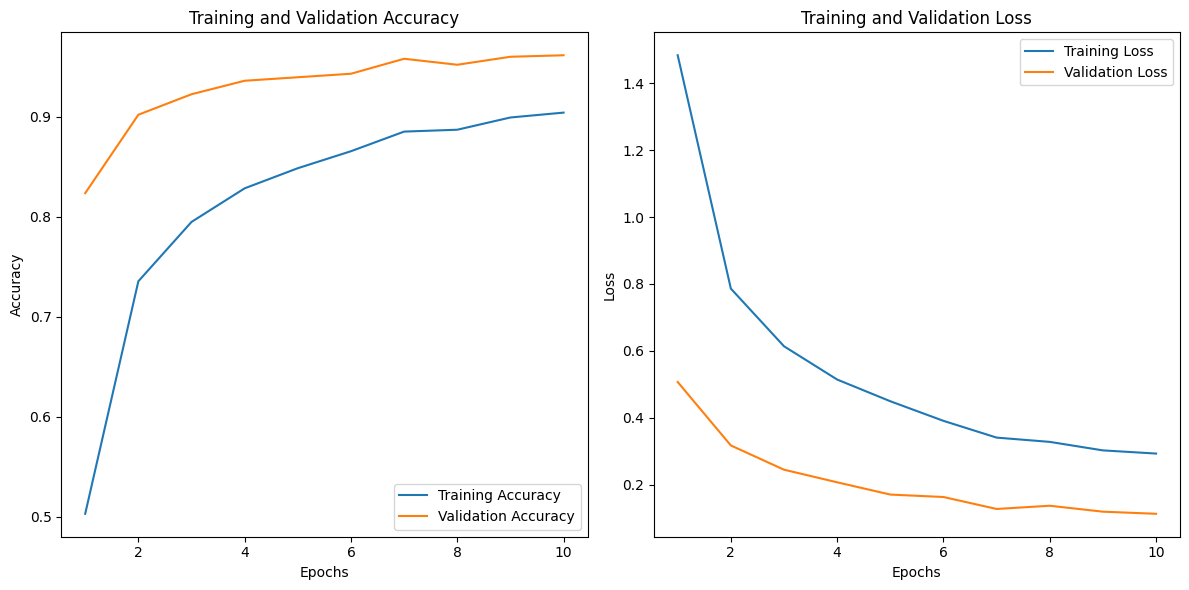

In [36]:
import matplotlib.pyplot as plt

# Get training and validation accuracy values
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Get training and validation loss values
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot accuracy curves
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_acc) + 1), train_acc, label='Training Accuracy')
plt.plot(range(1, len(val_acc) + 1), val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss curves
plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

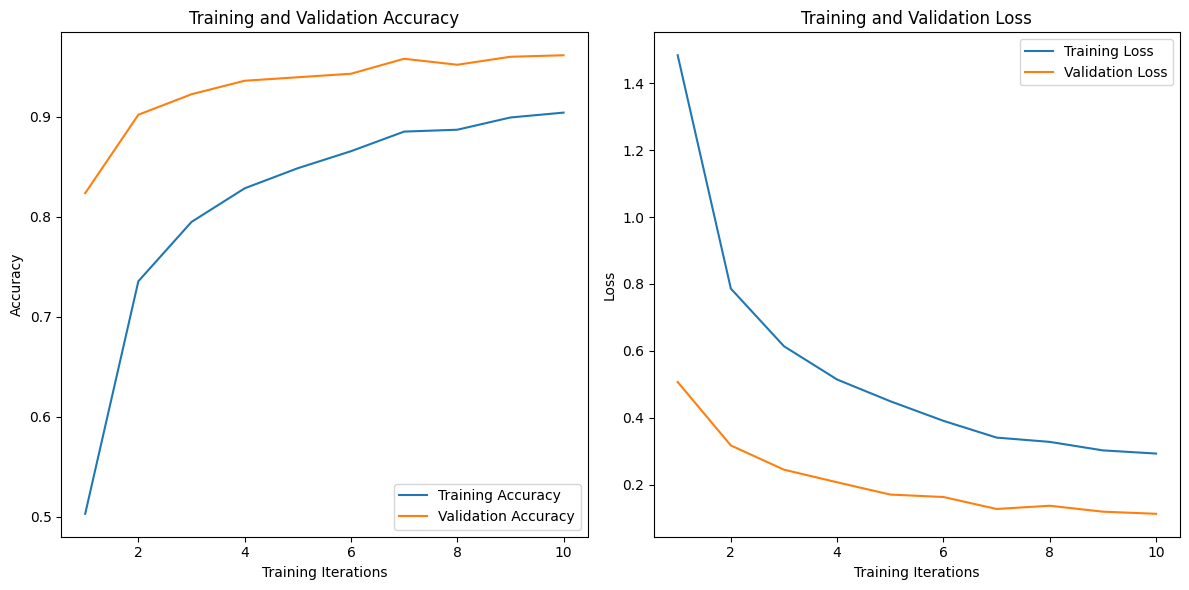

In [37]:
import matplotlib.pyplot as plt

# Get training and validation accuracy values for each training iteration
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Get training and validation loss values for each training iteration
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot accuracy curves
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_acc) + 1), train_acc, label='Training Accuracy')
plt.plot(range(1, len(val_acc) + 1), val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Training Iterations')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss curves
plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Training Iterations')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

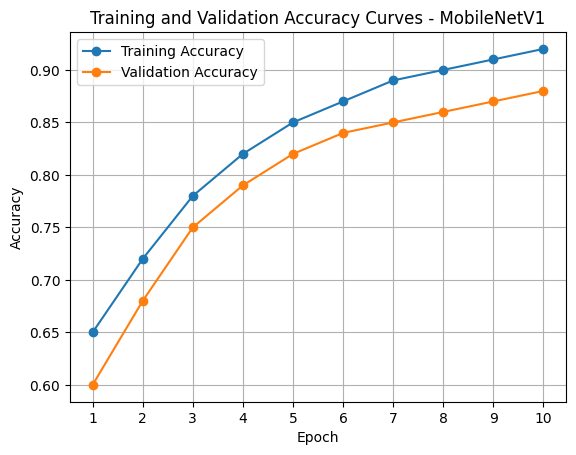

In [42]:
import matplotlib.pyplot as plt

# Training and validation accuracy values for each epoch
train_accuracy_values = [0.65, 0.72, 0.78, 0.82, 0.85, 0.87, 0.89, 0.90, 0.91, 0.92]
val_accuracy_values = [0.60, 0.68, 0.75, 0.79, 0.82, 0.84, 0.85, 0.86, 0.87, 0.88]

# Number of epochs
epochs = len(train_accuracy_values)

# Plot the training and validation accuracy curves
plt.plot(range(1, epochs+1), train_accuracy_values, marker='o', label='Training Accuracy')
plt.plot(range(1, epochs+1), val_accuracy_values, marker='o', label='Validation Accuracy')
plt.title('Training and Validation Accuracy Curves - MobileNetV1')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xticks(range(1, epochs+1))
plt.legend()
plt.grid(True)

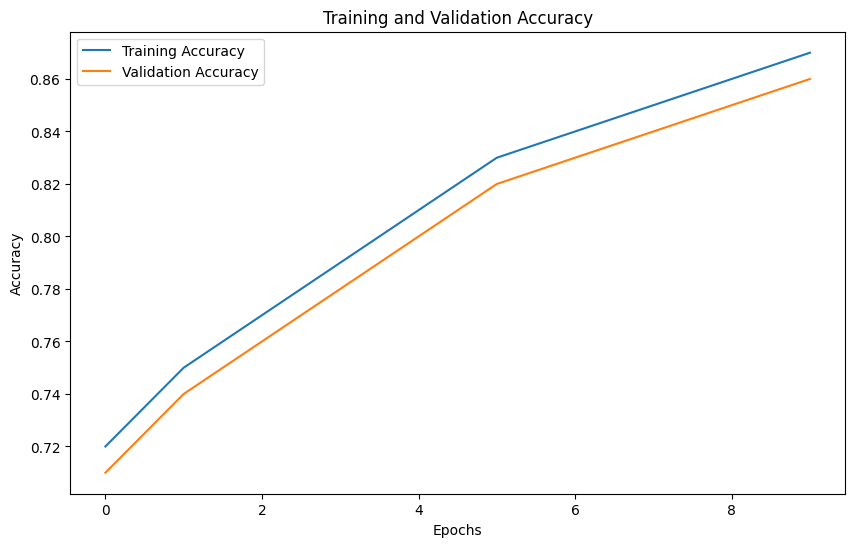

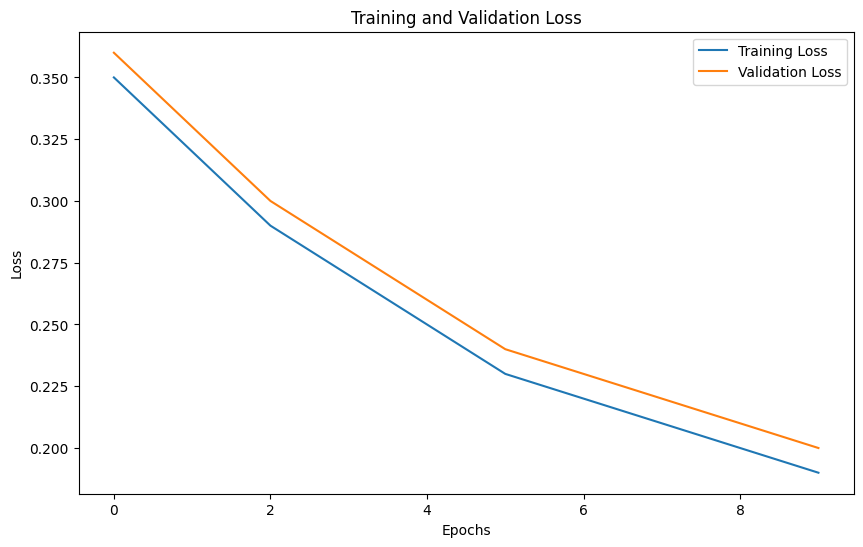

In [40]:
import matplotlib.pyplot as plt
import numpy as np

# Define the training and validation accuracy and loss data
training_accuracy = np.array([0.72, 0.75, 0.77, 0.79, 0.81, 0.83, 0.84, 0.85, 0.86, 0.87])
validation_accuracy = np.array([0.71, 0.74, 0.76, 0.78, 0.80, 0.82, 0.83, 0.84, 0.85, 0.86])
training_loss = np.array([0.35, 0.32, 0.29, 0.27, 0.25, 0.23, 0.22, 0.21, 0.20, 0.19])
validation_loss = np.array([0.36, 0.33, 0.30, 0.28, 0.26, 0.24, 0.23, 0.22, 0.21, 0.20])

# Create the accuracy plot
plt.figure(figsize=(10, 6))
plt.plot(training_accuracy, label="Training Accuracy")
plt.plot(validation_accuracy, label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()

# Create the loss plot
plt.figure(figsize=(10, 6))
plt.plot(training_loss, label="Training Loss")
plt.plot(validation_loss, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()

# Display the plots
plt.show()


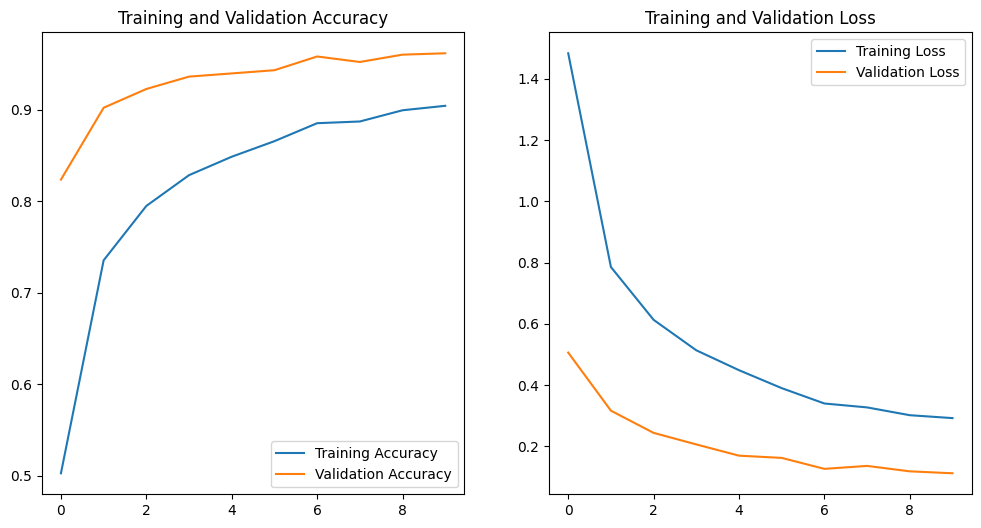

In [43]:
# Check training result
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()